In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from keras.activations import *
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,LSTM,GRU,Bidirectional
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, f1_score ,confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from yellowbrick.classifier import PrecisionRecallCurve, ROCAUC, ConfusionMatrix


In [25]:
x_train = pd.read_csv(r"/kaggle/input/ahcd1/csvTrainImages 13440x1024.csv",header=None)
y_train = pd.read_csv(r"/kaggle/input/ahcd1/csvTrainLabel 13440x1.csv",header=None)

x_test = pd.read_csv(r"/kaggle/input/ahcd1/csvTestImages 3360x1024.csv",header=None)
y_test = pd.read_csv(r"/kaggle/input/ahcd1/csvTestLabel 3360x1.csv",header=None)

print("x_train.shape =", x_train.shape, "\ny_train.shape =", 
      y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440, 1) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360, 1)


In [26]:
x_train = x_train.iloc[:,:].values
x_test = x_test.iloc[:,:].values
y_train = y_train.iloc[:,:].values
y_test = y_test.iloc[:,:].values
print("x_train.shape =", x_train.shape, "\ny_train.shape =", 
      y_train.shape, "\nx_test.shape =", x_test.shape, "\ny_test.shape =", y_test.shape)

x_train.shape = (13440, 1024) 
y_train.shape = (13440, 1) 
x_test.shape = (3360, 1024) 
y_test.shape = (3360, 1)


In [27]:
x_train = x_train.reshape(-1,32,32,1)
x_test = x_test.reshape(-1,32,32,1)

x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

(13440, 32, 32, 1) (3360, 32, 32, 1)


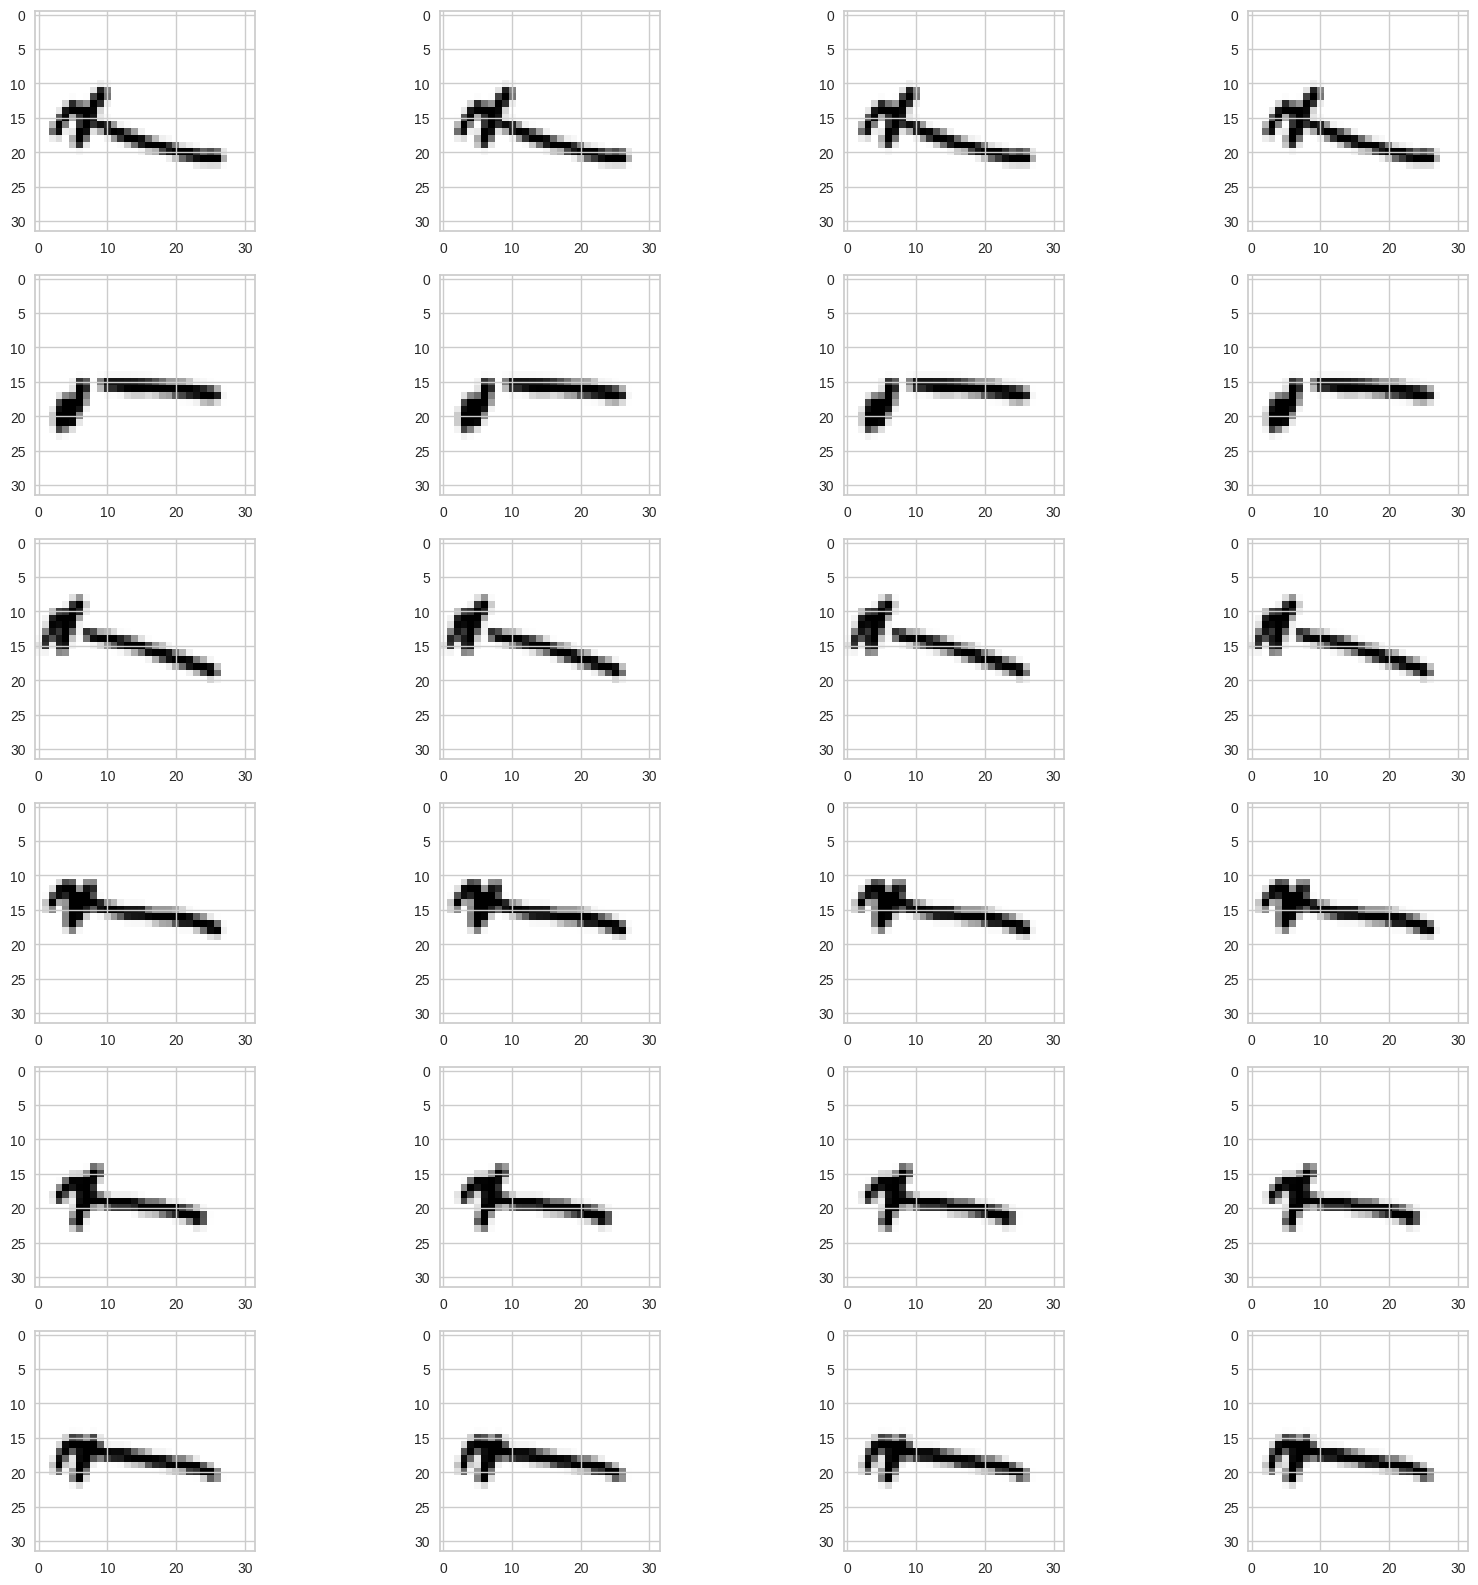

In [28]:
fig, ax = plt.subplots(6,4,figsize=(20,20))

for i in range(6):
    for j in range(4):
        ax[i,j].imshow(x_train[i])

In [29]:
total_classes = len(np.unique(y_train))+1
y_train = to_categorical(y_train,total_classes)
y_test = to_categorical(y_test, total_classes)

print(y_train.shape)
print(y_test.shape)

(13440, 29)
(3360, 29)


In [30]:
model = Sequential([
    
    
    Bidirectional(GRU(256, return_sequences=True, dropout=0.25), input_shape=(32,32)),
    Dense(256, activation='relu'),
    
    Bidirectional(GRU(128, return_sequences=True, dropout=0.5)),
    Dense(128, activation='relu'),
    
    Bidirectional(GRU(64, return_sequences=True, dropout=0.5)),
    Dense(64, activation='relu'),
    
    Bidirectional(GRU(32, return_sequences=True, dropout=0.5)),
    Dense(32, activation='relu'),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(total_classes, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_4 (Bidirectio  (None, 32, 512)          445440    
 nal)                                                            
                                                                 
 dense_7 (Dense)             (None, 32, 256)           131328    
                                                                 
 bidirectional_5 (Bidirectio  (None, 32, 256)          296448    
 nal)                                                            
                                                                 
 dense_8 (Dense)             (None, 32, 128)           32896     
                                                                 
 bidirectional_6 (Bidirectio  (None, 32, 128)          74496     
 nal)                                                            
                                                      

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [32]:
history = model.fit(x_train,y_train,
                    #steps_per_epoch=len(x_train)//128,
                    batch_size=128,
                    epochs=150,
                    validation_data=(x_test, y_test),
                   # validation_steps=50
                   )

Epoch 1/150
105/105 [==============================] - 17s 52ms/step - loss: 2.5037 - accuracy: 0.2018 - val_loss: 1.7135 - val_accuracy: 0.3786
Epoch 2/150
105/105 [==============================] - 3s 29ms/step - loss: 1.5611 - accuracy: 0.4435 - val_loss: 1.2458 - val_accuracy: 0.5366
Epoch 3/150
105/105 [==============================] - 3s 29ms/step - loss: 1.2003 - accuracy: 0.5551 - val_loss: 1.0181 - val_accuracy: 0.6241
Epoch 4/150
105/105 [==============================] - 3s 29ms/step - loss: 0.9923 - accuracy: 0.6296 - val_loss: 0.8558 - val_accuracy: 0.6789
Epoch 5/150
105/105 [==============================] - 3s 29ms/step - loss: 0.8693 - accuracy: 0.6740 - val_loss: 0.7581 - val_accuracy: 0.7143
Epoch 6/150
105/105 [==============================] - 3s 29ms/step - loss: 0.7815 - accuracy: 0.7073 - val_loss: 0.7086 - val_accuracy: 0.7426
Epoch 7/150
105/105 [==============================] - 3s 29ms/step - loss: 0.7029 - accuracy: 0.7388 - val_loss: 0.6417 - val_accuracy

In [33]:
y_held_pred=model.predict(x_test)

105/105 [==============================] - 3s 8ms/step


In [34]:
y_pred=np.argmax(y_held_pred, axis=1)
y_test_1=np.argmax(y_test, axis=1)

print(y_test_1.shape)
print(y_pred.shape)

(3360,)
(3360,)


In [35]:
model.evaluate(x_test,y_test)

105/105 [==============================] - 1s 10ms/step - loss: 0.2407 - accuracy: 0.9565


[0.24065296351909637, 0.9565476179122925]

In [36]:
his=model.evaluate(x_test, y_test, verbose=2);
print(his)

105/105 - 1s - loss: 0.2407 - accuracy: 0.9565 - 1s/epoch - 10ms/step
[0.24065296351909637, 0.9565476179122925]


In [37]:
y_held_pred_train=model.predict(x_train)

420/420 [==============================] - 3s 8ms/step


In [38]:
y_pred_train=np.argmax(y_held_pred_train, axis=1)
y_train_1=np.argmax(y_train, axis=1)

print(y_train_1.shape)
print(y_pred_train.shape)
model.evaluate(x_train, y_train, verbose=2);

(13440,)
(13440,)
420/420 - 4s - loss: 0.0035 - accuracy: 0.9990 - 4s/epoch - 10ms/step


<Axes: title={'center': 'Actual vs. Predicted'}, xlabel='Actual G*', ylabel='Predicted G*'>

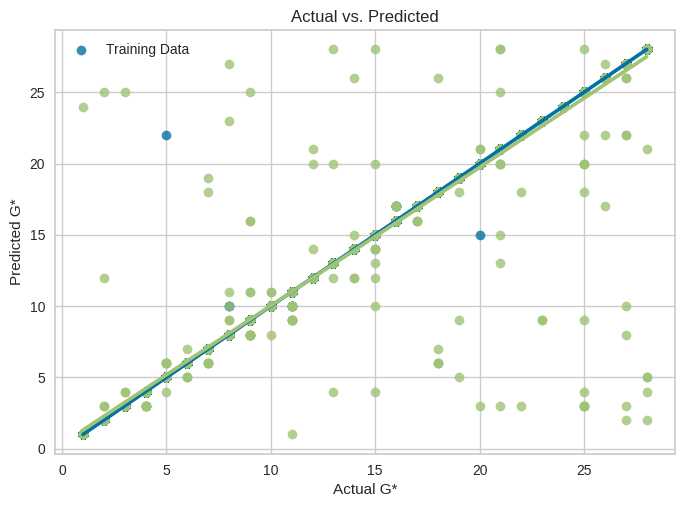

In [39]:
import seaborn as sns

sns.regplot(x=y_train_1,y=y_pred_train, label="Training Data")

plt.xlabel('Actual G*')
plt.ylabel('Predicted G*')
plt.title('Actual vs. Predicted')
plt.legend(loc="upper left")

sns.regplot(x=y_test_1,y=y_pred, label="Testing Data")

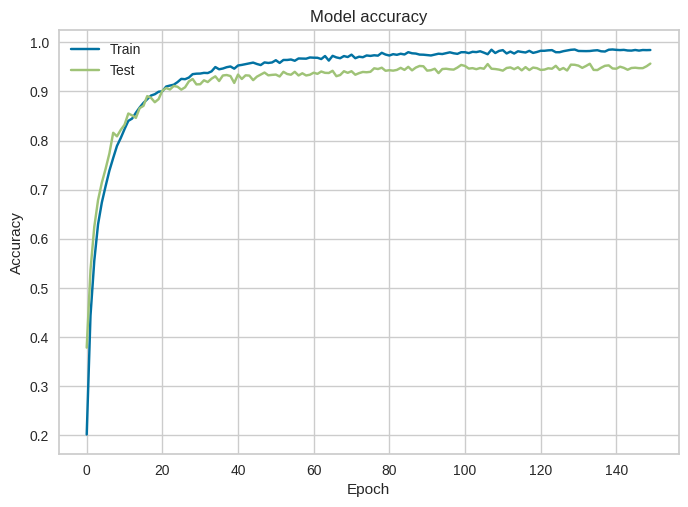

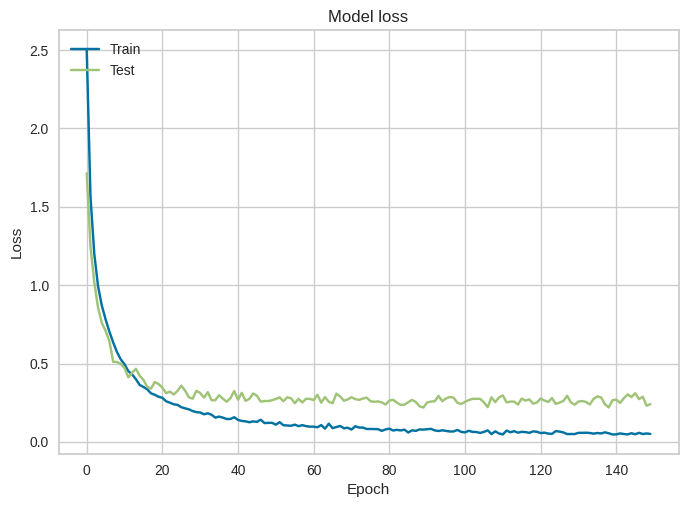

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [41]:
y_predicted = model.predict(x_test)
y_grand_truth = y_test
y_predicted = np.argmax(y_predicted,axis=1)
y_grand_truth = np.argmax(y_grand_truth,axis=1)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_grand_truth, y_predicted)

105/105 [==============================] - 1s 8ms/step


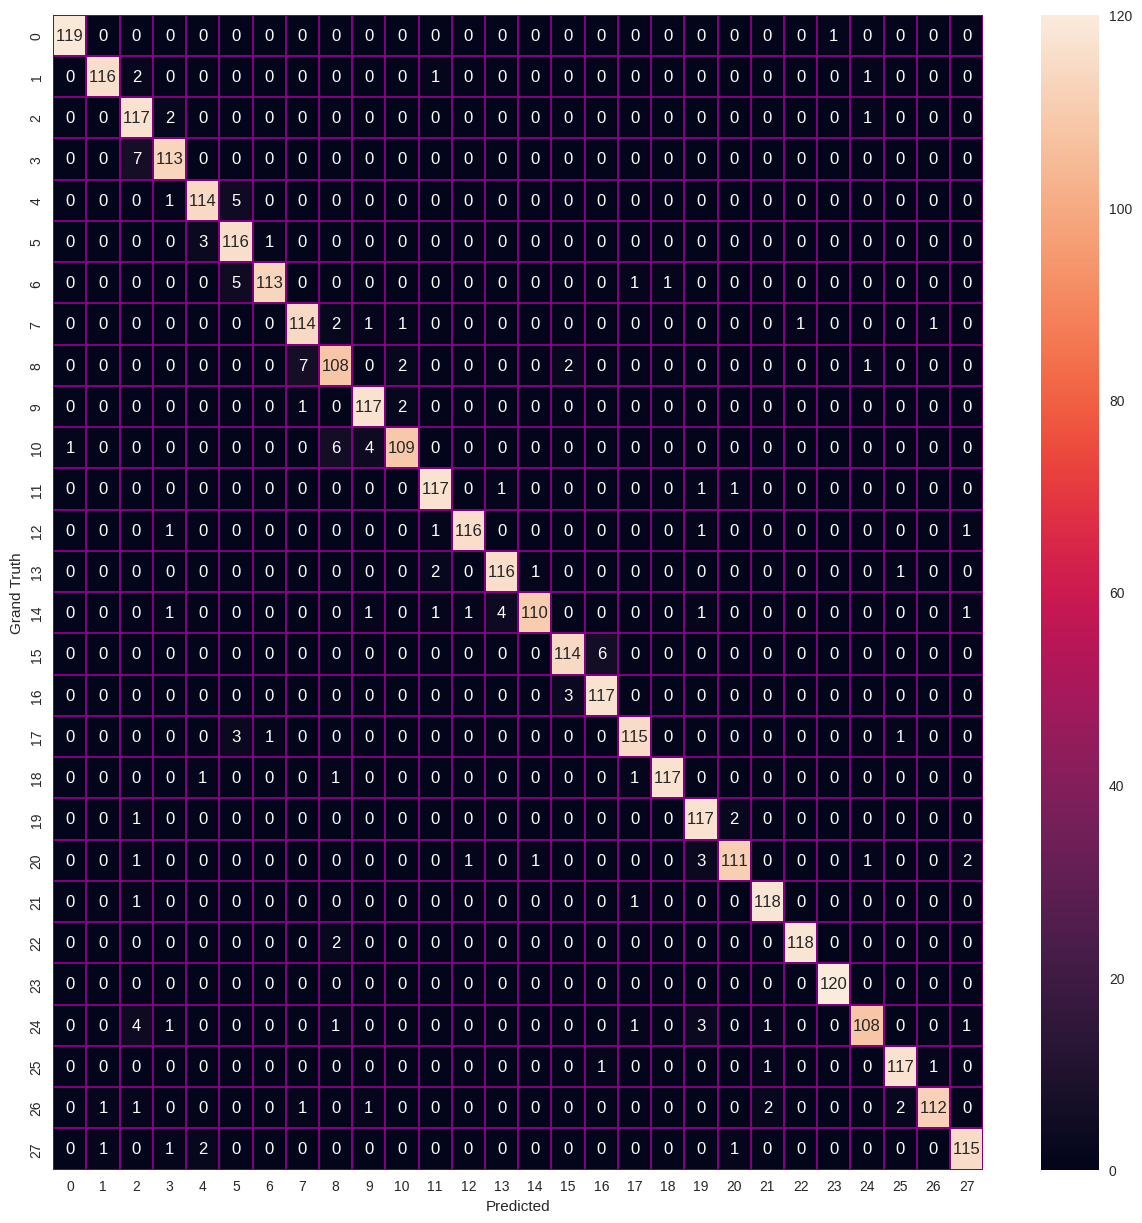

In [42]:
f, ax = plt.subplots(figsize=(15,15))
sns.heatmap(cm,fmt=".0f", annot=True,linewidths=0.1, linecolor="purple", ax=ax)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

In [43]:
scores = np.zeros((28,3))
def calc_F1(num):
  TP = cm[num,num]
  FN = np.sum(cm[num,:])-cm[num,num]
  FP = np.sum(cm[:,num])-cm[num,num]
  precision = TP/(TP+FP)
  recall = TP/(TP+FN)
  F1_score = 2*(recall * precision) / (recall + precision)
  return precision, recall, F1_score
for i in range(28):
   precision, recall, F1_score = calc_F1(i)
   scores[i,:] = precision, recall, F1_score
scores_frame = pd.DataFrame(scores,columns=["Precision", "Recall", "F1 Score"], index=[list(range(0, 28))])

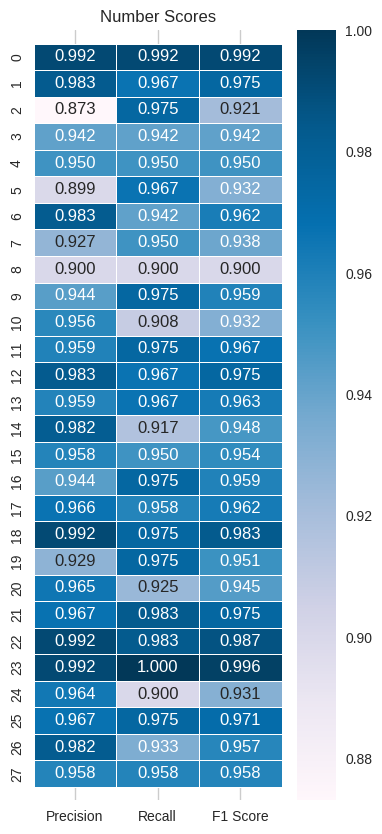

In [44]:
f, ax = plt.subplots(figsize = (4,10))
ax.set_title('Number Scores')
sns.heatmap(scores_frame, annot=True, fmt=".3f", linewidths=0.5, cmap="PuBu", cbar=True, ax=ax)
bottom, top = ax.get_ylim()
plt.ylabel("")
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [45]:
# Functions: Performance Evaluation 

def Performance(Model , y_predd): 
    
    # model accuracy
    accuracy = accuracy_score(y_test_1, y_predd)
    print( Model +' Accuracy:'+'\033[1m {:.2f}%'.format(accuracy*100))
    
    # model Classification Report
    print('\nClassification Report: '+'\033[0m')
    print('*' * 22)
    print(classification_report(y_test_1, y_predd))

In [46]:
Performance('Bi-GRU' , y_pred)

Bi-GRU Accuracy: 95.65%

Classification Report: 
**********************
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       120
           2       0.98      0.97      0.97       120
           3       0.87      0.97      0.92       120
           4       0.94      0.94      0.94       120
           5       0.95      0.95      0.95       120
           6       0.90      0.97      0.93       120
           7       0.98      0.94      0.96       120
           8       0.93      0.95      0.94       120
           9       0.90      0.90      0.90       120
          10       0.94      0.97      0.96       120
          11       0.96      0.91      0.93       120
          12       0.96      0.97      0.97       120
          13       0.98      0.97      0.97       120
          14       0.96      0.97      0.96       120
          15       0.98      0.92      0.95       120
          16       0.96      0.95      0.95       120
         